In [5]:
corr = ['../out/orthologs_condition_correlation_g%d.tsv' % x
        for x in range(4)]

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=11)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)

In [3]:
import itertools
import pandas as pd

In [6]:
rs = [pd.read_table(x)
      for x in corr]

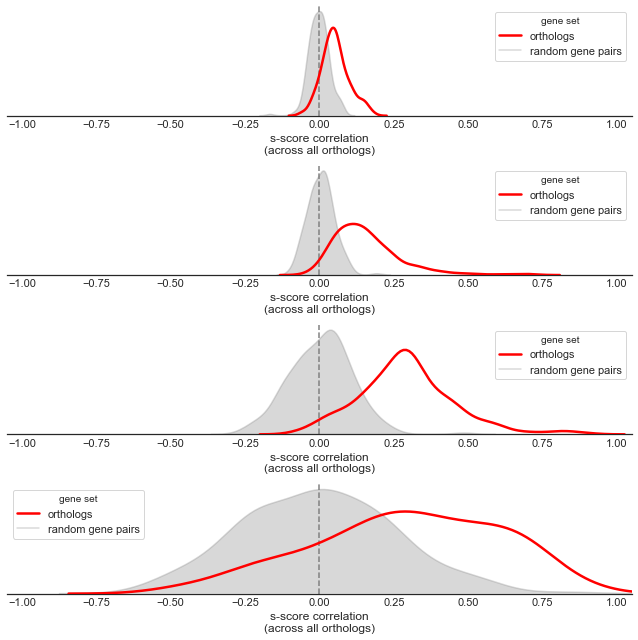

In [8]:
plt.figure(figsize=(9, 9))

for i, r in enumerate(rs):
    plt.subplot(4, 1, i+1)
    
    sns.kdeplot(r[r['set'] == 'same']['correlation'],
                label='orthologs',
                lw=2.5,
                color='r',
                zorder=10)
    sns.kdeplot(r[r['set'] == 'shuffled']['correlation'],
                label='random gene pairs',
                color='grey',
                shade=True,
                alpha=0.3)
    plt.legend(title='gene set',
               frameon=True)
    plt.xlabel('s-score correlation\n(across all orthologs)')
    plt.yticks([])
    plt.xlim(-1.05, 1.05)
    plt.axvline(0,
                color='grey',
                linestyle='dashed',
                zorder=0)
sns.despine(left=True)
plt.tight_layout();

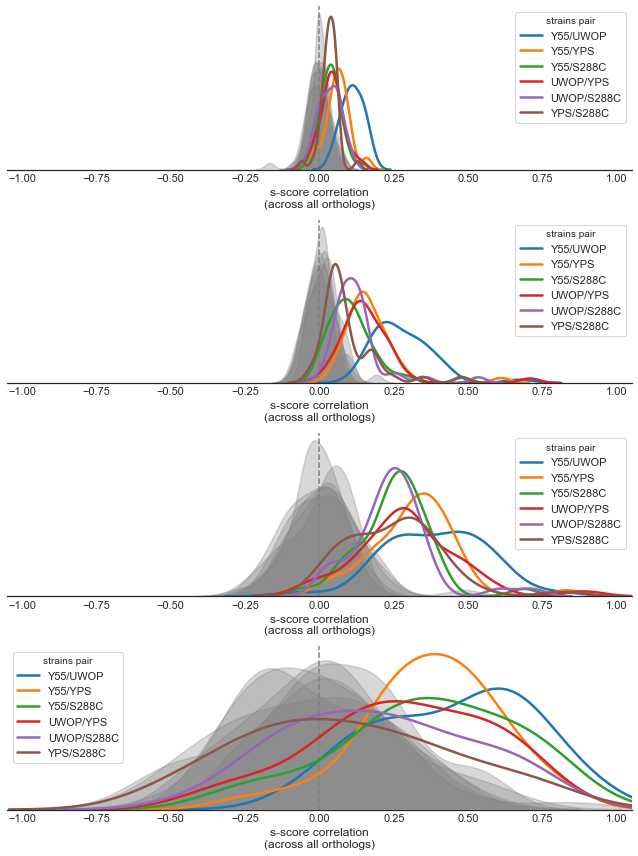

In [9]:
plt.figure(figsize=(9, 12))

for i, r in enumerate(rs):
    plt.subplot(4, 1, i+1)

    strains = set(r['strain1']).union(r['strain2'])
    for s1, s2 in itertools.combinations(strains, 2):
        sns.kdeplot(r[(r['set'] == 'same') &
                      (((r['strain1'] == s1) & ((r['strain2'] == s2))) |
                      ((r['strain2'] == s1) & ((r['strain1'] == s2))))
                     ]['correlation'],
                    label=s1 + '/' + s2,
                    lw=2.5)
        sns.kdeplot(r[(r['set'] == 'shuffled') &
                      (((r['strain1'] == s1) & ((r['strain2'] == s2))) |
                      ((r['strain2'] == s1) & ((r['strain1'] == s2))))
                     ]['correlation'],
                    color='grey',
                    shade=True,
                    alpha=0.3,
                    zorder=0,
                    label='_')

    plt.legend(title='strains pair',
               frameon=True)
    plt.xlabel('s-score correlation\n(across all orthologs)')
    plt.yticks([])
    plt.xlim(-1.05, 1.05)
    plt.axvline(0,
                color='grey',
                linestyle='dashed',
                zorder=0)
    
sns.despine(left=True)
plt.tight_layout();